<a href="https://colab.research.google.com/github/TerMinator-spec/Data-Engineer-Hackathon/blob/master/Jobathon_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount to drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True )

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/data_av.zip -d /content

Archive:  /content/gdrive/MyDrive/data_av.zip
   creating: /content/data/
  inflating: /content/data/VisitorLogsData.csv  
   creating: /content/data/.ipynb_checkpoints/
  inflating: /content/data/userTable.csv  


In [ ]:
#Import the necessary modules
import pandas as pd
import numpy as np

In [ ]:
#Load the visitors data
vis_data=pd.read_csv('/content/data/VisitorLogsData.csv')

In [ ]:
vis_data.head()

,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country
0,WI10000050298,2018-05-07 04:28:45.970,pr100631,NaN,NaN,Chrome Mobile,Android,Chennai,India
1,WI10000025922,2018-05-13 07:26:04.964,pr100707,NaN,NaN,Chrome,Windows,NaN,Taiwan
2,WI100000204522,2018-05-11 11:43:42.832,pr100030,NaN,click,Chrome,windows,Gurgaon,India
3,WI10000011974,2018-05-13 15:20:23.436,Pr100192,NaN,CLICK,Chrome,Windows,,
4,WI100000441953,2018-05-08 20:44:25.238,Pr100762,NaN,click,Chrome,mac os x,Iselin,United States


In [ ]:
#Load the user data
user_data=pd.read_csv('/content/data/userTable.csv')

In [ ]:
# Check the null values in user_data
user_data.isnull().sum()

UserID          0
Signup Date     0
User Segment    0
dtype: int64

In [ ]:
user_data.head()

,UserID,Signup Date,User Segment
0,U133159,2018-04-14 07:01:16.202607+00:00,C
1,U129368,2017-12-02 09:38:41.584270+00:00,B
2,U109654,2013-03-19 11:38:55+00:00,B
3,U108998,2018-01-18 08:29:51.627954+00:00,C
4,U131393,2018-03-27 08:05:28.806800+00:00,B


In [ ]:
#join the two tables on user_id
fin_data=pd.merge(vis_data, user_data,on='UserID')

In [ ]:
fin_data.head(20)

,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country,Signup Date,User Segment
0,WI100000112772,1526366895249000000,Pr100017,U106593,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
1,WI100000112772,2018-05-16 06:53:23.737,Pr100241,U106593,pageload,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
2,WI100000112772,2018-05-15 06:47:49.239,Pr100017,U106593,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
3,WI100000112772,2018-05-16 06:54:26.424,pr100901,U106593,PAGELOAD,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
4,WI100000112772,2018-05-15 06:47:36.691,Pr100017,U106593,CLICK,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
5,WI100000112772,2018-05-15 06:48:27.021,pr100219,U106593,NaN,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
6,WI100000112772,NaN,Pr100017,U106593,pageload,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
7,WI100000112772,2018-05-15 06:47:04.186,Pr100219,U106593,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
8,WI100000203515,2018-05-25 10:24:49.610,Pr102651,U106593,pageload,Chrome,Windows,,,2017-09-10 15:48:09.451327+00:00,B
9,WI100000112772,2018-05-15 06:47:57.298,Pr100017,U106593,NaN,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B


In [ ]:
# lets explore the data
print(fin_data.shape)
fin_data.describe()

(650695, 11)


,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country,Signup Date,User Segment
count,650695,585892,598732,650695,562938,650695,650695,414571,607868,650695,650695
unique,36791,542183,7673,34050,4,23,18,3613,2585,34038,3
top,WI10000057,2018-05-27 14:05:13.322,Pr101042,U100347,click,Chrome,Windows,Mumbai,India,2017-06-22 08:35:27.852396+00:00,B
freq,8877,4,53225,14671,316230,498641,431129,41180,401385,14671,321089


In [ ]:
fin_data.isnull().sum()
# There are large amount of missing values in our dataset

webClientID           0
VisitDateTime     64803
ProductID         51963
UserID                0
Activity          87757
Browser               0
OS                    0
City             236124
Country           42827
Signup Date           0
User Segment          0
dtype: int64

In [ ]:
# fill the missing visitdatetime, productid, activity using ffill
fin_data['VisitDateTime'] = fin_data['VisitDateTime'].ffill(axis=0)
fin_data['ProductID'] = fin_data['ProductID'].ffill(axis=0)
fin_data['Activity'] = fin_data['Activity'].ffill(axis=0)

In [ ]:
fin_data.isnull().sum()

webClientID           0
VisitDateTime         0
ProductID             0
UserID                0
Activity              0
Browser               0
OS                    0
City             236124
Country           42827
Signup Date           0
User Segment          0
dtype: int64

In [ ]:
# Convert all the rows of visitdatetime into suitable date time format
new_l=[] #list containing all the timestamps
for i in range(fin_data.shape[0]):
  if(fin_data.iloc[i,1][4]=='-'): # checking if string is not unix
      new_l.append(pd.to_datetime(fin_data.iloc[i,1],unit='ns'))
  else: # if unix then convert str to int then to datetime
      new_l.append(pd.to_datetime(int(fin_data.iloc[i,1]),unit='ns'))



In [ ]:
# Add new_l to our dataframe also set date time as index
fin_data['vis_time']=new_l
fin_data=fin_data.set_index(fin_data['vis_time'])

In [ ]:
fin_data.head()

,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country,Signup Date,User Segment,vis_time
vis_time,,,,,,,,,,,,
2018-05-15 06:48:15.249,WI100000112772,1526366895249000000,pr100017,U106593,click,chrome mobile,android,,,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:48:15.249
2018-05-16 06:53:23.737,WI100000112772,2018-05-16 06:53:23.737,pr100241,U106593,pageload,chrome mobile,android,,,2017-09-10 15:48:09.451327+00:00,B,2018-05-16 06:53:23.737
2018-05-15 06:47:49.239,WI100000112772,2018-05-15 06:47:49.239,pr100017,U106593,click,chrome mobile,android,,,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:47:49.239
2018-05-16 06:54:26.424,WI100000112772,2018-05-16 06:54:26.424,pr100901,U106593,pageload,chrome mobile,android,,,2017-09-10 15:48:09.451327+00:00,B,2018-05-16 06:54:26.424
2018-05-15 06:47:36.691,WI100000112772,2018-05-15 06:47:36.691,pr100017,U106593,click,chrome mobile,android,,,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:47:36.691


In [ ]:
df_fin=fin_data

In [ ]:
# There are some changes needs to be done in df_fin
#product id starts with "Pr" or 'pr'
df_fin['ProductID']=df_fin["ProductID"].str.lower()
# Change "CLICK" to 'click' and 'PAGELOAD' to 'pageload'
df_fin['Activity']=df_fin["Activity"].str.lower()
# all the OS in lowercase
df_fin['OS']=df_fin["OS"].str.lower()
# all the browsers in lowercase
df_fin['Browser']=df_fin["Browser"].str.lower()

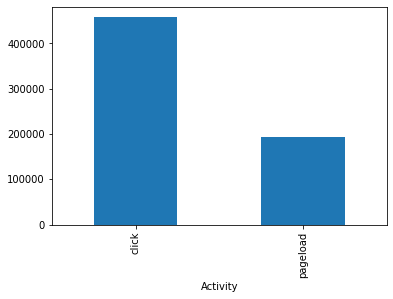

In [ ]:
#let's explore our dataset
X=df_fin
X.groupby('Activity')['UserID'].count().plot.bar()

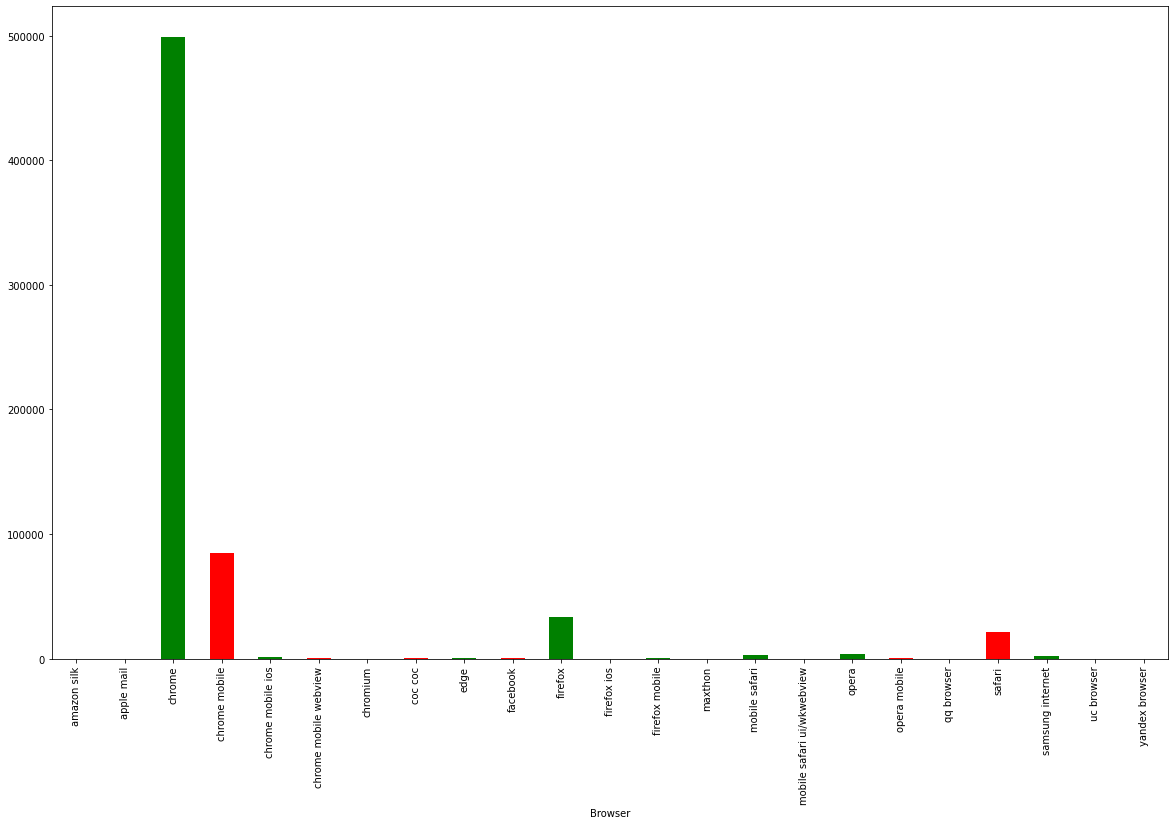

In [ ]:
X.groupby('Browser')['UserID'].count().plot.bar(color=['green','red'], figsize=(20,12))
# Chrome was used mostly

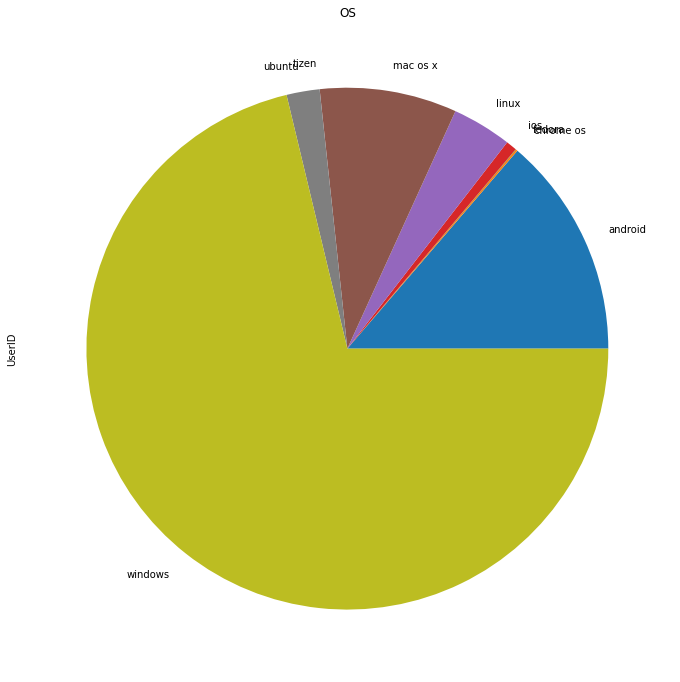

In [ ]:
X.groupby('OS')['UserID'].count().plot.pie( title="OS",figsize=(20,12))
# Windows is the most used OS

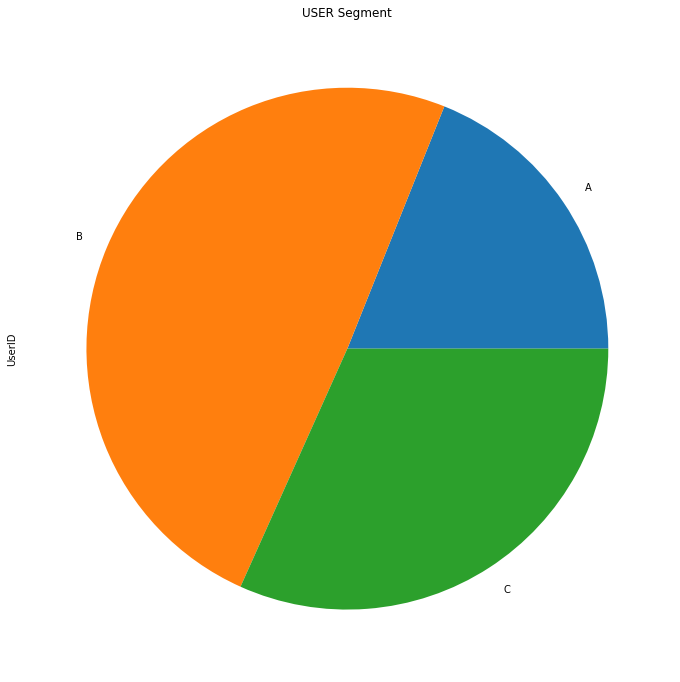

In [ ]:
X.groupby('User Segment')['UserID'].count().plot.pie( title="USER Segment",figsize=(20,12)) 

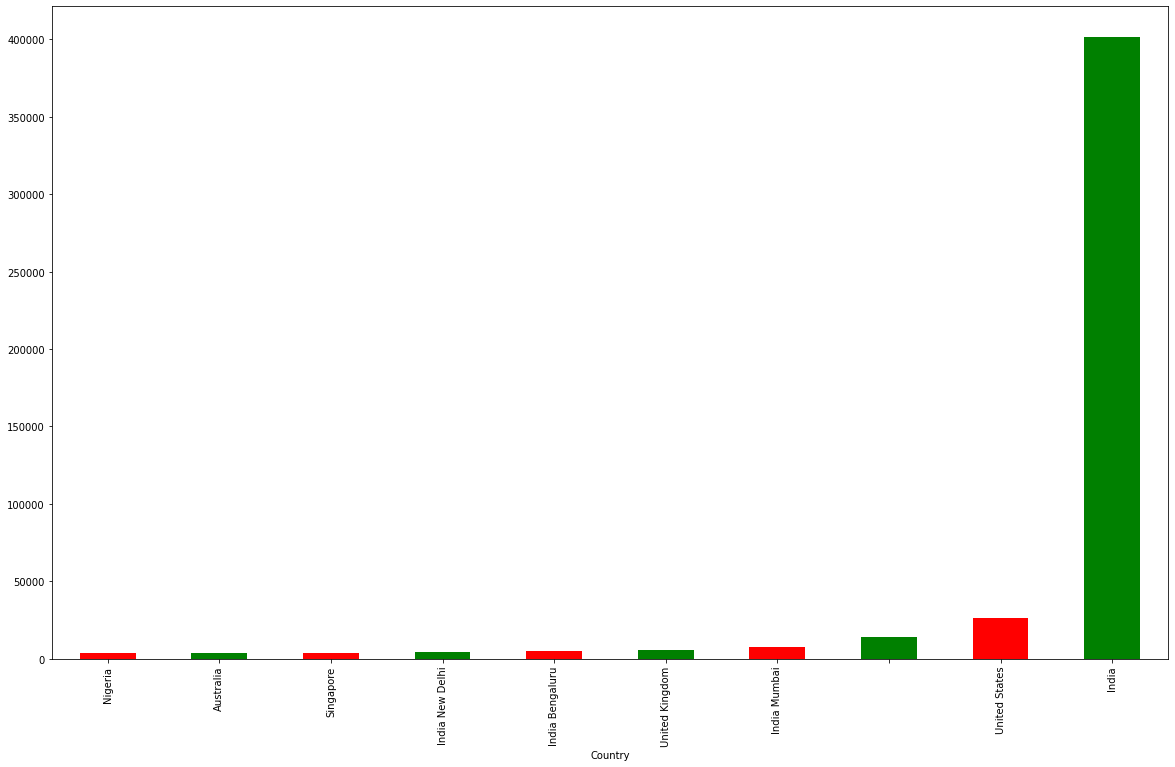

In [ ]:
X.groupby('Country')['UserID'].count().sort_values()[-10:].plot.bar(color=['red','green'], figsize=(20,12))

In [ ]:
# drop the country and city columns as we won't be using them for further analysis
df_fin=df_fin.drop(['Country','VisitDateTime', 'City'], axis=1)

In [ ]:
df_fin.isnull().sum()

webClientID     0
ProductID       0
UserID          0
Activity        0
Browser         0
OS              0
Signup Date     0
User Segment    0
vis_time        0
dtype: int64

In [ ]:
df_fin.head()
# Now our data is clean and ready

,webClientID,ProductID,UserID,Activity,Browser,OS,Signup Date,User Segment,vis_time
vis_time,,,,,,,,,
2018-05-15 06:48:15.249,WI100000112772,pr100017,U106593,click,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:48:15.249
2018-05-16 06:53:23.737,WI100000112772,pr100241,U106593,pageload,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-16 06:53:23.737
2018-05-15 06:47:49.239,WI100000112772,pr100017,U106593,click,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:47:49.239
2018-05-16 06:54:26.424,WI100000112772,pr100901,U106593,pageload,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-16 06:54:26.424
2018-05-15 06:47:36.691,WI100000112772,pr100017,U106593,click,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:47:36.691


In [ ]:
#How many days a user was active on platform in the last 7 days
max(df_fin['vis_time']) # maximum datetime

Timestamp('2018-05-27 23:59:23.729000')

In [ ]:
#Since the last day is 27 may 2018
last_date=pd.Timestamp(2018, 5, 28, 0,0,0)

In [ ]:
last_date

Timestamp('2018-05-28 00:00:00')

In [ ]:
a=pd.Timedelta(days=7) # getting time delta of past 7 days
wkday=last_date-a # getting date of 7 days before today

In [ ]:
wkday

Timestamp('2018-05-21 00:00:00')

In [ ]:
X=df_fin
X['day']=X['vis_time'].dt.day # getting the day from datetime

In [ ]:
X.head()

,webClientID,ProductID,UserID,Activity,Browser,OS,Signup Date,User Segment,vis_time,day
vis_time,,,,,,,,,,
2018-05-15 06:48:15.249,WI100000112772,pr100017,U106593,click,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:48:15.249,15
2018-05-16 06:53:23.737,WI100000112772,pr100241,U106593,pageload,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-16 06:53:23.737,16
2018-05-15 06:47:49.239,WI100000112772,pr100017,U106593,click,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:47:49.239,15
2018-05-16 06:54:26.424,WI100000112772,pr100901,U106593,pageload,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-16 06:54:26.424,16
2018-05-15 06:47:36.691,WI100000112772,pr100017,U106593,click,chrome mobile,android,2017-09-10 15:48:09.451327+00:00,B,2018-05-15 06:47:36.691,15


In [ ]:
# Select values only last 7 days older 
# count how many times a user visited the same day
X_7=X[(X['vis_time']>wkday) & (X['vis_time']<last_date) & (X['Activity']!='no activity')].groupby(['UserID','day'])['ProductID'].count().reset_index()
# count the number of unique days user visited
X_q1=X_7.groupby('UserID')['day'].count().reset_index()

In [ ]:
X_q1=X_q1.rename(columns={'day':'No_of_days_Visited_7_Days'}) # required dataframe for no. of visits in last 7 days
X_q1

,UserID,No_of_days_Visited_7_Days
0,U100003,1
1,U100004,1
2,U100005,1
3,U100006,1
4,U100008,6
...,...,...
16865,U136749,1
16866,U136830,1
16867,U136933,1
16868,U136936,1


In [ ]:
#Number of Products viewed by the user in the last 15 days
b=pd.Timedelta(days=15) # getting time delta of past 15 days
day15=last_date-b # getting date of 15 days before today

In [ ]:
day15

Timestamp('2018-05-13 00:00:00')

In [ ]:
X['vis_time']=pd.to_datetime(X['vis_time'])

In [ ]:
# Select values only last 15 days older 
# Count the number of times user viewed a particular product
X_15=X[(X['vis_time']>day15) & (X['vis_time']<last_date)].groupby(['UserID', 'ProductID'])['Activity'].count().reset_index()
# COunt the unique number of products viewed by the user
X_q2=X_15.groupby('UserID')['Activity'].count().reset_index()

In [ ]:
X_q2=X_q2.rename(columns={'Activity':'No_Of_Products_Viewed_15_Days'})
X_q2 # number of products viewed

,UserID,No_Of_Products_Viewed_15_Days
0,U100002,2
1,U100003,3
2,U100004,15
3,U100005,3
4,U100006,1
...,...,...
26731,U136849,1
26732,U136933,1
26733,U136936,1
26734,U136956,1


In [ ]:
# Vintage user
X_vin=user_data.drop('User Segment', axis=1) # drop user segment from user_data

In [ ]:
X_vin['Signup Date']=pd.to_datetime(X_vin['Signup Date']) # Change to datetime format
X_vin['Signup Date']=X_vin['Signup Date'].dt.tz_localize(None) #remove the timezone
X_vin['user_vintage']=last_date-X_vin['Signup Date'] #find age of each user
X_vin['user_vintage']=X_vin['user_vintage'].dt.days #find age in days

In [ ]:
X_q3=X_vin.copy()

In [ ]:
X_q3.drop('Signup Date',axis=1, inplace=True)
X_q3=X_q3.rename(columns={'user_vintage':'User_Vintage'})
X_q3

,UserID,User_Vintage
0,U133159,43
1,U129368,176
2,U109654,1895
3,U108998,129
4,U131393,61
...,...,...
34045,U134073,69
34046,U113667,88
34047,U128470,84
34048,U104005,125


In [ ]:
# Most frequently viewed (page loads) product by the user in the last 15 days
# Consider values only 15 days older and activity should be pageload
# Find the number of times a product was viewed and most recent time it was viewed
X_15=X[(X['vis_time']>day15) & (X['vis_time']<last_date)  & (X['Activity']=='pageload')].groupby(['UserID', 'ProductID'])['day','vis_time'].agg({'day':'count','vis_time':'max'}).reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [ ]:
X_15[:60]

,UserID,ProductID,day,vis_time
0,U100002,pr100258,3,2018-05-18 10:43:56.628
1,U100003,pr100079,1,2018-05-25 02:15:57.831
2,U100004,pr100069,1,2018-05-20 14:38:37.204
3,U100004,pr100142,1,2018-05-16 18:25:41.371
4,U100004,pr100197,1,2018-05-17 13:52:57.648
5,U100004,pr100311,3,2018-05-21 13:36:01.227
6,U100004,pr100312,1,2018-05-15 13:41:57.137
7,U100004,pr100355,1,2018-05-18 11:34:47.329
8,U100004,pr100408,1,2018-05-17 11:40:35.288
9,U100004,pr100591,1,2018-05-17 12:44:48.718


In [ ]:
# Groupby by number of times a product was viewed and if products were viewed same number of time then select the most recent one
xa=X_15.groupby(['UserID','day']).apply(lambda x: x[x['vis_time']==x['vis_time'].max()]['ProductID']).reset_index()

In [ ]:
xa.drop('level_2', axis=1, inplace=True)# drop the additional column

In [ ]:
# Select the product IDs which were viewed the most
X_q4=xa.groupby('UserID').apply(lambda x: x[x['day']==x['day'].max()]['ProductID']).reset_index().drop('level_1',axis=1)

In [ ]:

X_q4=X_q4.rename(columns={'ProductID':'Most_Viewed_product_15_Days'})
X_q4 #table representing most viewed products in 15 days


,UserID,Most_Viewed_product_15_Days
0,U100002,pr100258
1,U100003,pr100079
2,U100004,pr100311
3,U100005,pr100234
4,U100006,pr101111
...,...,...
24456,U136758,pr100051
24457,U136838,pr100499
24458,U136840,pr100166
24459,U136936,pr100003


In [ ]:
X_q4=X_q4.drop_duplicates(subset=['UserID'], keep='first').reset_index(drop=True) # drop the duplicates if any

In [ ]:
#Most Frequently used OS by user. 
a=X.groupby(['UserID', 'OS'])['Activity'].count().reset_index() # Count the number of times each OS is used by the user

In [ ]:
# FInd the OS which is uded mostly by each user
X_q5=a.groupby('UserID').apply(lambda x: x[x['Activity']==x['Activity'].max()]['OS']).reset_index().drop('level_1', axis=1)

In [ ]:
X_q5=X_q5.drop_duplicates(subset=['UserID'], keep='first').reset_index(drop=True) # drop duplicates if any

In [ ]:
X_q5=X_q5.rename(columns={'OS':'Most_Active_OS'})
X_q5 #table representing frequent used OS

,UserID,Most_Active_OS
0,U100002,android
1,U100003,windows
2,U100004,windows
3,U100005,android
4,U100006,android
...,...,...
34045,U136960,windows
34046,U136961,android
34047,U136963,android
34048,U136964,windows


In [ ]:
# Filter with activity= pageloads and then select product IDs which were viewed most recently
X_q6=X[(X['Activity']=='pageload')].groupby(['UserID']).apply(lambda x: x[x['vis_time']==x['vis_time'].max()]['ProductID']).reset_index()


In [ ]:
X_q6[:60]

,UserID,vis_time,ProductID
0,U100002,2018-05-18 10:43:56.628,pr100258
1,U100003,2018-05-25 02:15:57.831,pr100079
2,U100004,2018-05-21 13:36:01.227,pr100311
3,U100005,2018-05-26 01:06:30.258,pr100234
4,U100006,2018-05-21 07:21:59.460,pr101111
5,U100007,2018-05-12 01:45:25.101,pr100265
6,U100007,2018-05-12 01:45:25.101,pr100265
7,U100008,2018-05-27 02:14:24.003,pr100962
8,U100009,2018-05-26 12:00:36.685,pr100640
9,U100012,2018-05-27 22:19:38.766,pr100055


In [ ]:
X_q6.drop('vis_time',axis=1, inplace=True)
X_q6=X_q6.rename(columns={'ProductID':'Recently_Viewed_Product'})
X_q6
# table showing recently viewed products

,UserID,Recently_Viewed_Product
0,U100002,pr100258
1,U100003,pr100079
2,U100004,pr100311
3,U100005,pr100234
4,U100006,pr101111
...,...,...
34894,U136957,pr100118
34895,U136959,pr100102
34896,U136961,pr101381
34897,U136963,pr100166


In [ ]:
X_q6=X_q6.drop_duplicates(subset=['UserID'], keep='first').reset_index(drop= True) # drop duplicates if any

In [ ]:
#Count of Page loads in the last 7 days by the user
# Select last 7 days only and activity=pageload then find count for each userID
X_q7=X[(X['vis_time']>wkday) & (X['vis_time']<last_date) & (X['Activity']=='pageload')].groupby(['UserID'])['Activity'].count().reset_index()

In [ ]:

X_q7=X_q7.rename(columns={'Activity':'Pageloads_last_7_days'})
X_q7 #Count of Page loads in the last 7 days by the user

,UserID,Pageloads_last_7_days
0,U100003,1
1,U100004,1
2,U100005,1
3,U100006,1
4,U100008,23
...,...,...
14969,U136566,1
14970,U136604,1
14971,U136677,1
14972,U136749,1


In [ ]:
#Count of Clicks in the last 7 days  by the user
# Select last 7 days only and activity=click then find count for each userID
X_q8=X[(X['vis_time']>wkday) & (X['vis_time']<last_date) & (X['Activity']=='click')].groupby(['UserID'])['Activity'].count().reset_index()
X_q8=X_q8.rename(columns={'Activity':'Clicks_last_7_days'})
X_q8

,UserID,Clicks_last_7_days
0,U100003,2
1,U100005,1
2,U100008,34
3,U100009,6
4,U100012,16
...,...,...
11690,U136582,2
11691,U136611,1
11692,U136830,1
11693,U136933,1


In [ ]:
df=user_data['UserID'].sort_values().reset_index() # make a dataframe consisting of all userIDs

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df

,UserID
0,U100002
1,U100003
2,U100004
3,U100005
4,U100006
...,...
34045,U136960
34046,U136961
34047,U136963
34048,U136964


In [ ]:

dfs=[X_q1,X_q2, X_q3, X_q4, X_q5, X_q6, X_q7, X_q8] #list comprising of all dataframes
for i in range(len(dfs)):
  df=pd.merge(df,dfs[i],how='left', on='UserID') # Merge all dataframes on userID


In [ ]:
df.isnull().sum()

UserID                               0
No_of_days_Visited_7_Days        17180
No_Of_Products_Viewed_15_Days     7314
User_Vintage                         0
Most_Viewed_product_15_Days       9911
Most_Active_OS                       0
Recently_Viewed_Product           2829
Pageloads_last_7_days            19076
Clicks_last_7_days               22355
dtype: int64

In [ ]:
# If a user has not viewed any product in the last 15 days then put it as Product101
df['Most_Viewed_product_15_Days']=df['Most_Viewed_product_15_Days'].fillna('Product101') 

In [ ]:
# If a user has not viewed any product then put it as Product101
df['Recently_Viewed_Product']=df['Recently_Viewed_Product'].fillna('Product101')

In [ ]:
df=df.fillna(0)

In [ ]:
df

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U100002,0.0,2.0,52,pr100258,android,pr100258,0.0,0.0
1,U100003,1.0,3.0,1020,pr100079,windows,pr100079,1.0,2.0
2,U100004,1.0,15.0,340,pr100311,windows,pr100311,1.0,0.0
3,U100005,1.0,3.0,680,pr100234,android,pr100234,1.0,1.0
4,U100006,1.0,1.0,54,pr101111,android,pr101111,1.0,0.0
...,...,...,...,...,...,...,...,...,...
34045,U136960,0.0,0.0,754,Product101,windows,Product101,0.0,0.0
34046,U136961,0.0,0.0,59,Product101,android,pr101381,0.0,0.0
34047,U136963,1.0,1.0,1419,Product101,android,pr100166,0.0,1.0
34048,U136964,0.0,0.0,494,Product101,windows,Product101,0.0,0.0


In [ ]:
df.isnull().sum()

UserID                           0
No_of_days_Visited_7_Days        0
No_Of_Products_Viewed_15_Days    0
User_Vintage                     0
Most_Viewed_product_15_Days      0
Most_Active_OS                   0
Recently_Viewed_Product          0
Pageloads_last_7_days            0
Clicks_last_7_days               0
dtype: int64

In [ ]:
df.to_csv('/content/gdrive/MyDrive/input_features.csv')